In [17]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dataPath = "data/paradigms/clean/"

vocabulary = open(dataPath + "vocabulary.txt").read().splitlines()

neutral_topic_mean = np.load("neutral_topic_mean.npy")
negative_topic_mean = np.load("negative_topic_mean.npy")
positive_topic_mean = np.load("positive_topic_mean.npy")
authors = pd.read_csv("authors.csv")
authors["name"]

decoder = pd.read_csv(dataPath +'id_name_para.csv', index_col=0)['Judge Name']


In [2]:
# @title Run this cell to create helper function for printing topics


def get_topics(
    neutral_mean, negative_mean, positive_mean, vocabulary, print_to_terminal=True
):
    num_topics, num_words = neutral_mean.shape
    words_per_topic = 10
    top_neutral_words = np.argsort(-neutral_mean, axis=1)
    top_negative_words = np.argsort(-negative_mean, axis=1)
    top_positive_words = np.argsort(-positive_mean, axis=1)
    topic_strings = []
    for topic_idx in range(num_topics):
        neutral_start_string = "Neutral  {}:".format(topic_idx)
        neutral_row = [
            vocabulary[word] for word in top_neutral_words[topic_idx, :words_per_topic]
        ]
        neutral_row_string = ", ".join(neutral_row)
        neutral_string = " ".join([neutral_start_string, neutral_row_string])

        positive_start_string = "Positive {}:".format(topic_idx)
        positive_row = [
            vocabulary[word] for word in top_positive_words[topic_idx, :words_per_topic]
        ]
        positive_row_string = ", ".join(positive_row)
        positive_string = " ".join([positive_start_string, positive_row_string])

        negative_start_string = "Negative {}:".format(topic_idx)
        negative_row = [
            vocabulary[word] for word in top_negative_words[topic_idx, :words_per_topic]
        ]
        negative_row_string = ", ".join(negative_row)
        negative_string = " ".join([negative_start_string, negative_row_string])

        if print_to_terminal:
            topic_strings.append(negative_string)
            topic_strings.append(neutral_string)
            topic_strings.append(positive_string)
            topic_strings.append("==========")
        else:
            topic_strings.append(
                "  \n".join([negative_string, neutral_string, positive_string])
            )

    if print_to_terminal:
        all_topics = "{}\n".format(np.array(topic_strings))
    else:
        all_topics = np.array(topic_strings)
    return all_topics

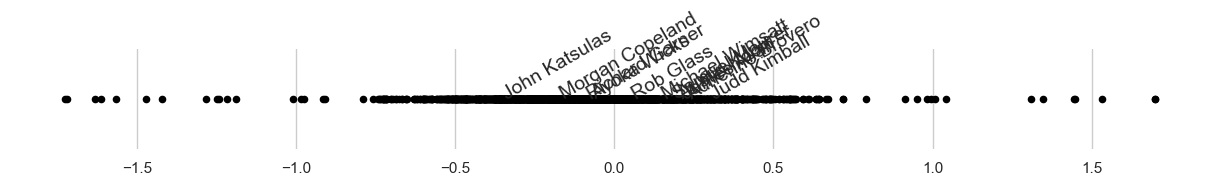

In [3]:
selected_authors = np.array(
    [
        "Rob Glass",
        "James Allan",
        "Michael Wimsatt",
        "Richard Garner",
        "Austin Koort",
        "Adrienne Brovero",
        "Nyx Moore",
        "Judd Kimball",
        "Ayoka Wicks",
        "Morgan Copeland",
        "John Katsulas",
        "Samuel Maurer"
    ]
)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 1))
ax = plt.axes([0, 0, 1, 1], frameon=False)
for index in range(authors.shape[0]):
    ax.scatter(authors["ideal_point"][index], 0, c="black", s=20)
    if decoder[authors["name"][index]] in selected_authors:
        ax.annotate(
            decoder[authors["name"][index]],
            xy=(authors["ideal_point"][index], 0.0),
            xytext=(authors["ideal_point"][index], 0),
            rotation=30,
            size=14,
        )
ax.set_yticks([])
plt.show()



In [4]:
authors.drop('Unnamed: 0', inplace=True, axis=1)
authors.sort_values('ideal_point', inplace=True)
authors.rename({'name':'Judge ID'}, axis=1, inplace=True)
authors.set_index('Judge ID', inplace=True)
authors = authors.merge(decoder, on='Judge ID')

In [5]:

authors.head(-20)

,ideal_point,Judge Name
Judge ID,,
508289,-1.727299,Lee Robinson
508296,-1.718477,Joseph Amoroso
34021,-1.632761,Isabella Minter
291187,-1.613843,Jeilyn Haynes
107418,-1.565523,Koi Kizzie
...,...,...
56122,0.608958,Ashe Tippins
254093,0.611204,Maxine Adams
9666,0.632637,Phoebe Kuo


In [18]:

topics = get_topics(neutral_topic_mean, positive_topic_mean, negative_topic_mean, vocabulary)
topics

"['Negative 0: paperless, line, community, while, activity, particular, resolution, result, overviews, strategy'\n 'Neutral  0: activity, decision, line, community, clash, issues, particular, each, role, claims'\n 'Positive 0: decision, clash, speeches, decisions, students, usually, persuasive, role, activity, examples'\n '=========='\n 'Negative 1: high school, judged, coached, year, now, hs, ndt, haven, went, coach'\n 'Neutral  1: high school, ld, stuff, care, coach, year, email chain, judged, coached, now'\n 'Positive 1: ld, pf, disclosure, fw, wiki, phil, speaks, opponent, traditional, tricks'\n '=========='\n 'Negative 2: thought, counterplans, legal, persuasive, counterplan, seems, may, political, defend, question'\n 'Neutral  2: fairness, seems, model, fiat, kick, risk, likely, less, could, conditionality'\n 'Positive 2: fairness, model, likely, presumption, absent, threshold, whether, reasonability, kick, judges'\n '=========='\n 'Negative 3: fun, performance, run, enjoy, open,

In [19]:
neutral_topic_mean.shape

(10, 9752)

In [20]:
from wordcloud import WordCloud

In [26]:
word_freq = dict(zip(vocabulary, neutral_topic_mean[0,:]))
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

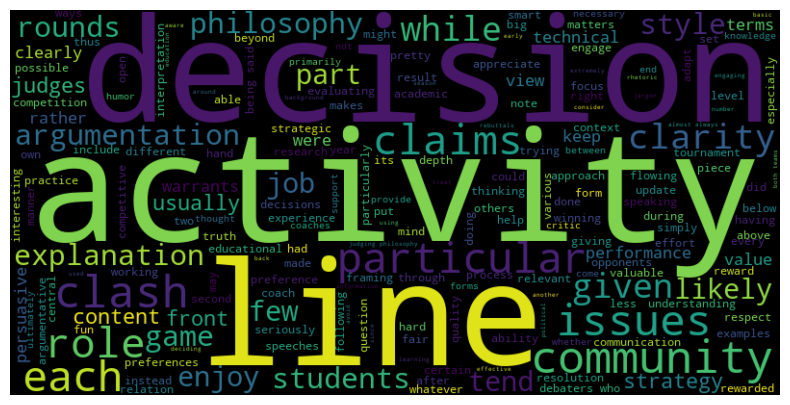

In [27]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

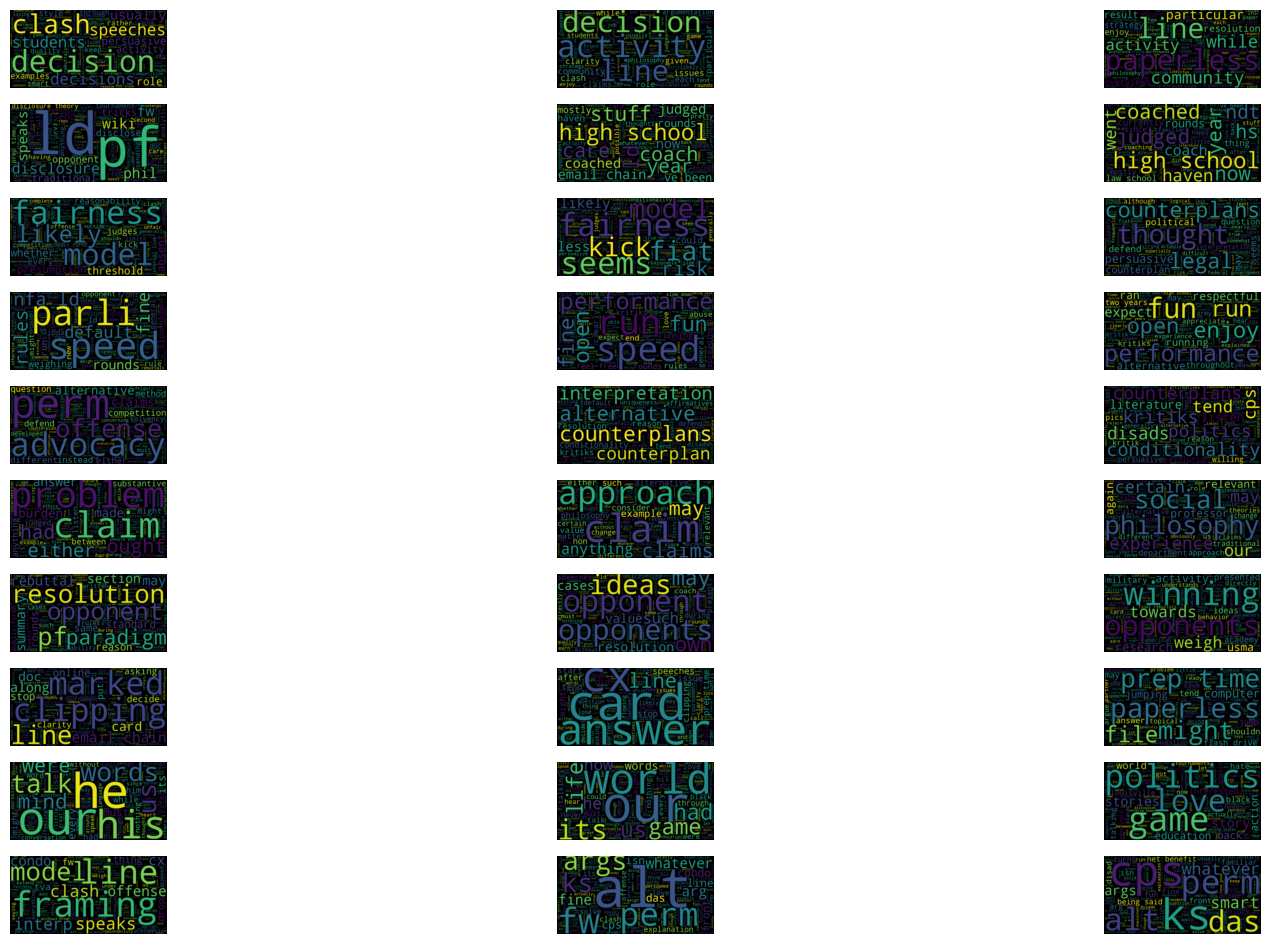

In [33]:
means_list = [negative_topic_mean, neutral_topic_mean, positive_topic_mean]

fig, axes = plt.subplots(10,3, figsize=(20,12))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        word_freq = dict(zip(vocabulary, means_list[j][i,:]))
        wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        


In [34]:
authors.head()

,Unnamed: 0,name,ideal_point
0,0,1,0.247996
1,1,3,0.104361
2,2,319,0.183162
3,3,1057,0.023055
4,4,1088,1.698272
